In [36]:
import numpy as np
import tensorflow 
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
import itertools
from matplotlib import pyplot as plt
%matplotlib inline
import glob
import matplotlib.image as mpimg
from keras.preprocessing import image
import imageio as im
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing import image
from keras.layers import Dropout
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [37]:
# loading datatset by passing Train,Test and Validation Data Path
def load_data(batchSize,train_path,val_path,test_path):
    # loading Training Dataset
    train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(128,128),classes =['c_0','c_1','c_2','c_3','c_4','c_5','c_6','c_7','c_8','c_9','c_10',
                                                                                                        'c_11','c_12','c_13','c_14','c_15','c_16','c_17','c_18','c_19','c_20',
                                                                                                        'c_21','c_22','c_23','c_24','c_25','c_26','c_27','c_28','c_29','c_30',
                                                                                                        'c_31','c_32','c_33','c_34','c_35','c_36','c_37'],batch_size=batchSize)
    # Loading Validation Dataset
    val_batches = ImageDataGenerator().flow_from_directory(val_path,target_size=(128,128),classes =['c_0','c_1','c_2','c_3','c_4','c_5','c_6','c_7','c_8','c_9','c_10',
                                                                                                    'c_11','c_12','c_13','c_14','c_15','c_16','c_17','c_18','c_19','c_20',
                                                                                                    'c_21','c_22','c_23','c_24','c_25','c_26','c_27','c_28','c_29','c_30',
                                                                                                    'c_31','c_32','c_33','c_34','c_35','c_36','c_37'],batch_size=batchSize)
    # Loading Testing Dataset
    test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(128,128),classes =['c_0','c_1','c_2','c_3','c_4','c_5','c_6','c_7','c_8','c_9','c_10',
                                                                                                      'c_11','c_12','c_13','c_14','c_15','c_16','c_17','c_18','c_19','c_20',
                                                                                                      'c_21','c_22','c_23','c_24','c_25','c_26','c_27','c_28','c_29','c_30',
                                                                                                      'c_31','c_32','c_33','c_34','c_35','c_36','c_37'],batch_size=batchSize)
    return train_batches,val_batches,test_batches
    

In [38]:
train_path = 'I:/train/' # path to Training Data
val_path = 'I:/val/' # path to Validation Data
test_path = 'C:/Users/Sunny/Convnet/output1/m1/' # path to Testing Data
batchSize = 10 # Number of images pass to NN at a time
learning_rate = 0.001
epochs = 60
steps = int(35354/batchSize) + 1

In [39]:
train,val,test = load_data(batchSize,train_path,val_path,test_path)

Found 35354 images belonging to 38 classes.
Found 4396 images belonging to 38 classes.
Found 0 images belonging to 38 classes.


In [40]:
# Visulaize the Training Data 
def visualize(ims, figsize=(12,6), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3): ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

D:\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


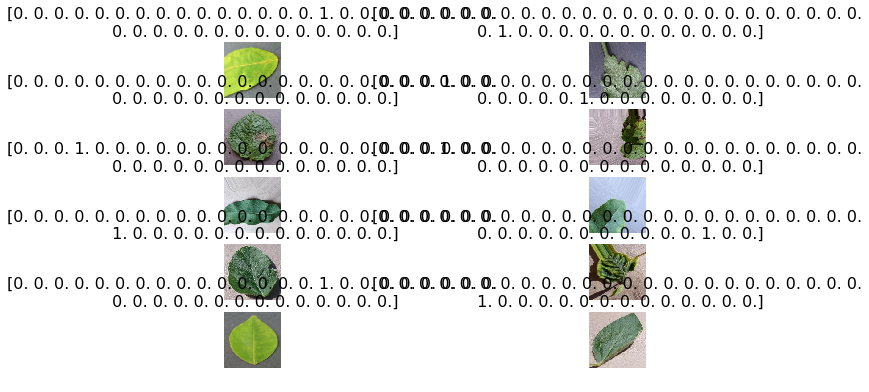

In [41]:
img,labels = next(train) # Passing 1 batch of data for Visualization

#Visualize Data of Batch Size = 10 and 38 Labels for 1 Image
visualize(img,titles=labels)

In [42]:
def create_model(learning_rate,train,epochs,steps):
    
    #Creating the Sequential Model
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),input_shape=(128,128,3),padding='same')) # 64 Filters of size (3 x 3 x 3) with Padding = 1
    model.add(Activation('relu'))

    model.add(Conv2D(64,(3,3),padding='same')) 
    model.add(BatchNormalization()) # Batch Normalization
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 1

    model.add(Dropout(0.25)) # Dropout Layer
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu')) 

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 2

    model.add(Dropout(0.25)) # Dropout Layer
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu')) 

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu'))

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 3

    model.add(Dropout(0.25)) # Dropout Layer
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu')) 

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu'))

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 4

    model.add(Flatten()) # Flatten into MLP
    model.add(BatchNormalization())  # Batch Normalization

    model.add(Dense(128)) # Densely Connected Layer (Fully Connected 1)
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(128)) # Densely Connected Layer (Fully Connected 2)
    model.add(BatchNormalization()) # Batch Normalization
    model.add(Activation('relu'))

    model.add(Dense(38,activation='softmax')) # 38 Neurons in Last Layer
    model.build()
    model.compile(Adam(lr=learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit_generator(train,steps_per_epoch=steps,epochs=epochs)
    return model,history

In [44]:
model,history = create_model(learning_rate,train,epochs,steps) # Creating Model
model.summary()

In [45]:
model.save('FinalModel.h5')

In [47]:
testsize = 4396 # No. of images for Testing
test_steps = testsize/batchSize # No. of steps for Testing
predictions = model.predict_generator(test,steps=test_steps,verbose=0) # Predicting Labels

In [30]:
true_labels = test.classes # Storing True Labels to Find Test Accuracy

In [32]:
predicted_labels = np.zeros((4396,1)) # Creating Array to Find Predicted Labels

In [31]:
count = 0
for i in range(0,4396):
    for j in range(0,38):
        if predictions[i][j] == max(predictions[i]): # Finding Max. To Find Predicted Class
            if j == true_labels[i]: 
                predicted_labels[i] = j
                count+=1
print(count)
print(count/4396)

In [35]:
# No Batch-Normalization and No Dropout + Augmentation "CustomModel.h5"
print(f1_score(true_labels,predicted_labels, average="macro")) # Finding F1-Score
print(precision_score(true_labels,predicted_labels, average="macro")) # Finding Precision
print(recall_score(true_labels,predicted_labels, average="macro"))  # Finding Recall

In [49]:
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

from keras.utils import plot_model
plot_model(model,to_file='model.png')